## Bibliotecas

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
import pyspark.sql.types as t
from pyspark.sql.window import Window

## Setup

In [2]:
import findspark

findspark.init()

In [3]:
spark = SparkSession.builder.config('spark.executor.memory', '8G').getOrCreate()

In [4]:
imdb_path = '../data/imdb/'

In [5]:
df_titles = spark.read.format("parquet").load(imdb_path + 'title_basics')
df_ratings = spark.read.format("parquet").load(imdb_path + 'title_ratings')

## Diferentes tipos de Dados

### Tipos Básicos de Dados

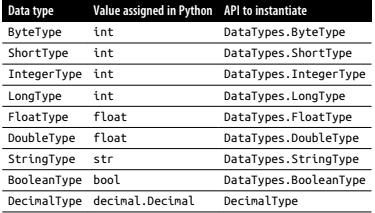

### Tipos Complexos de Dados

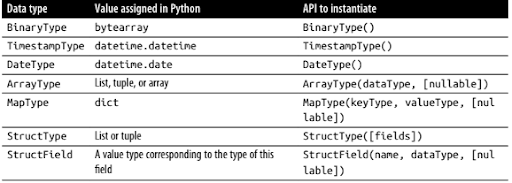

### Acessando os Tipos do Spark

In [6]:
from pyspark.sql.types import *

In [7]:
int_type = IntegerType()

In [8]:
array_type = ArrayType(IntegerType())

### Convertendo os tipos de Colunas

In [9]:
df.show()

+-----+---+
| nome| id|
+-----+---+
|Pedro|  4|
| João|  5|
+-----+---+



In [10]:
df.dtypes

[('nome', 'string'), ('id', 'string')]

In [11]:
df.select('nome', col('id').cast(IntegerType())).dtypes

[('nome', 'string'), ('id', 'int')]

In [12]:
IntegerType() == 'int'
StringType() == 'string'
FloatType() == 'float'

ArrayType(IntegerType()) == 'ARRAY<INT>'

False

In [13]:
df.select('nome', col('id').cast('int')).dtypes

[('nome', 'string'), ('id', 'int')]

## Schema e Criação de DataFrames

Um schema no Spark é uma especificação de tipos das colunas de um DataFrame. Eles são usados na leitura de dados externos e criação de DataFrames, e podem ser passados diretamente ao Spark ou podem ser  inferidos. Passar um schema na leitura traz benefícios interessantes, como:

* Evita que o Spark faça inferência de tipos, o que é custoso e demorado dependendo do tamanho do arquivo, além de propenso a erros;
* Permite que o usuário identifique erros nos dados logo na leitura, caso os dados não sigam o schema especificado.


In [14]:
df = spark.createDataFrame([('Pedro', 1), ('João', 6), ('Juliana', 4), ('Lucas', 7)], schema = ['nome', 'id'])

In [15]:
df.show()

+-------+---+
|   nome| id|
+-------+---+
|  Pedro|  1|
|   João|  6|
|Juliana|  4|
|  Lucas|  7|
+-------+---+



In [16]:
df.dtypes

[('nome', 'string'), ('id', 'bigint')]

### Criando schemas programticamente

In [17]:
schema = StructType([StructField('nome', StringType()), StructField('id', IntegerType()),])

In [18]:
df = spark.createDataFrame([('Pedro', 1), ('João', 6), ('Juliana', 4), ('Lucas', 7)], schema = schema)

In [19]:
df.show()

+-------+---+
|   nome| id|
+-------+---+
|  Pedro|  1|
|   João|  6|
|Juliana|  4|
|  Lucas|  7|
+-------+---+



In [20]:
df.dtypes

[('nome', 'string'), ('id', 'int')]

### Criando schemas com DDL

In [21]:
schema = 'nome STRING, id INT'

In [22]:
df = spark.createDataFrame([('Pedro', 1), ('João', 6), ('Juliana', 4), ('Lucas', 7)], schema = schema)

In [23]:
df.show()

+-------+---+
|   nome| id|
+-------+---+
|  Pedro|  1|
|   João|  6|
|Juliana|  4|
|  Lucas|  7|
+-------+---+



In [24]:
df.dtypes

[('nome', 'string'), ('id', 'int')]

### Criando DataFrames

In [25]:
data = [('Pedro', 1), ('João', 6), ('Juliana', 4), ('Lucas', 7)]

In [26]:
schema = 'nome STRING, id INT'

In [27]:
df = spark.createDataFrame(data, schema=schema)

In [28]:
df.dtypes

[('nome', 'string'), ('id', 'int')]

In [29]:
df.schema

StructType(List(StructField(nome,StringType,true),StructField(id,IntegerType,true)))

In [30]:
df.printSchema()

root
 |-- nome: string (nullable = true)
 |-- id: integer (nullable = true)



In [31]:
spark.range(100).show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+
only showing top 20 rows



In [ ]:
df = spark.createDataFrame(pandas_df)

## Leitura e Escrita de Dados

In [32]:
data_path = 'D:/projects/edc-cap3/'

In [33]:
file_path = 'D:/projects/edc-cap3/df_cnae.csv'

### DataFrameReader

```
spark.read.format(format).option(args).load(file/path)
```

### DataFrameWriter

```
df.write.format(format).option(args).save(file/path)
```

### Lendo e Escrevendo CSV

Opções mais comuns:
* header
* inferSchema
* sep
* encoding

In [34]:
df = spark.read.format('csv').load(file_path)

In [35]:
df.limit(15).show()

+--------------------+
|                 _c0|
+--------------------+
|"0111301";"Cultiv...|
|"0111302";"Cultiv...|
|"0111303";"Cultiv...|
|"0111399";"Cultiv...|
|"0112101";"Cultiv...|
|"0112102";"Cultiv...|
|"0112199";"Cultiv...|
|"0113000";"Cultiv...|
|"0114800";"Cultiv...|
|"0115600";"Cultiv...|
|"0116401";"Cultiv...|
|"0116402";"Cultiv...|
|"0116403";"Cultiv...|
|"0116499";"Cultiv...|
|"0119901";"Cultiv...|
+--------------------+



### Definindo o schema

In [36]:
schema = 'cod_cnae STRING, descricao_cnae STRING'

### Opção de Correção 1

In [37]:
df = spark.read.csv(file_path, sep=';', encoding='ISO-8859-1', schema=schema)
df.limit(5).show()

+--------+--------------------+
|cod_cnae|      descricao_cnae|
+--------+--------------------+
| 0111301|    Cultivo de arroz|
| 0111302|    Cultivo de milho|
| 0111303|    Cultivo de trigo|
| 0111399|Cultivo de outros...|
| 0112101|Cultivo de algodã...|
+--------+--------------------+



### Opção de Correção 2

In [38]:
df = (
    spark.read
    .format('csv')
    .option('sep', ';')
    .option('encoding', 'ISO-8859-1')
    .schema(schema)
    .load(file_path)
)
df.limit(5).show()

+--------+--------------------+
|cod_cnae|      descricao_cnae|
+--------+--------------------+
| 0111301|    Cultivo de arroz|
| 0111302|    Cultivo de milho|
| 0111303|    Cultivo de trigo|
| 0111399|Cultivo de outros...|
| 0112101|Cultivo de algodã...|
+--------+--------------------+



### Opção de Correção 3

In [39]:
df = (
    spark.read
    .format('csv')
    .options(sep=';', encoding='ISO-8859-1')
    .schema(schema)
    .load(file_path)
)
df.limit(5).show()

+--------+--------------------+
|cod_cnae|      descricao_cnae|
+--------+--------------------+
| 0111301|    Cultivo de arroz|
| 0111302|    Cultivo de milho|
| 0111303|    Cultivo de trigo|
| 0111399|Cultivo de outros...|
| 0112101|Cultivo de algodã...|
+--------+--------------------+



Obs: utilizando o método "options" podemos parametrizar melhor nossa função usando um dicionário

In [40]:
options_dict = {
    'sep': ';',
    'encoding': 'ISO-8859-1',
}

df = (
    spark.read
    .format('csv')
    .options(**options_dict)
    .schema('cod_cnae INT, descricao_cnae STRING')
    .load(file_path)
)
df.limit(5).show()

+--------+--------------------+
|cod_cnae|      descricao_cnae|
+--------+--------------------+
|  111301|    Cultivo de arroz|
|  111302|    Cultivo de milho|
|  111303|    Cultivo de trigo|
|  111399|Cultivo de outros...|
|  112101|Cultivo de algodã...|
+--------+--------------------+



In [41]:
df.printSchema()

root
 |-- cod_cnae: integer (nullable = true)
 |-- descricao_cnae: string (nullable = true)



In [43]:
df.write.format('csv').save(data_path + 'df_cnae_teste.csv', header=True, )

In [44]:
spark.read.format('csv').load(data_path + 'df_cnae_teste', header=True).printSchema()

root
 |-- cod_cnae: string (nullable = true)
 |-- descricao_cnae: string (nullable = true)



In [45]:
df.toPandas().to_csv(data_path + 'df_cnae_pandas.csv', index=False, header=True)

### Lendo e Escrevendo JSON

In [46]:
df.write.format('json').save(data_path + 'df_cnae.json')

In [48]:
df_json = spark.read.format('json').load(data_path + 'df_cnae.json')

In [49]:
df_json.show()

+--------+--------------------+
|cod_cnae|      descricao_cnae|
+--------+--------------------+
|  111301|    Cultivo de arroz|
|  111302|    Cultivo de milho|
|  111303|    Cultivo de trigo|
|  111399|Cultivo de outros...|
|  112101|Cultivo de algodã...|
|  112102|     Cultivo de juta|
|  112199|Cultivo de outras...|
|  113000|Cultivo de cana-d...|
|  114800|     Cultivo de fumo|
|  115600|     Cultivo de soja|
|  116401| Cultivo de amendoim|
|  116402| Cultivo de girassol|
|  116403|   Cultivo de mamona|
|  116499|Cultivo de outras...|
|  119901|  Cultivo de abacaxi|
|  119902|     Cultivo de alho|
|  119903|Cultivo de batata...|
|  119904|   Cultivo de cebola|
|  119905|   Cultivo de feijão|
|  119906| Cultivo de mandioca|
+--------+--------------------+
only showing top 20 rows



In [50]:
df_json.printSchema()

root
 |-- cod_cnae: long (nullable = true)
 |-- descricao_cnae: string (nullable = true)



### Lendo e Escrevendo ORC

In [51]:
formato = 'orc'
df.write.format(formato).save(data_path + 'df_cnae.' + formato)

In [55]:
df_orc = spark.read.format(formato).load(data_path + 'df_cnae.orc')

In [56]:
df_orc.printSchema()

root
 |-- cod_cnae: integer (nullable = true)
 |-- descricao_cnae: string (nullable = true)



### Lendo e Escrevendo Parquet

* Armazenamento colunar, em contraste com o CSV, que armazena baseado nas linhas. Assim, quando uma query é realizada é possível ignorar os dados não relevantes de maneira rápida e fácil, resultando em operações bem mais eficientes;
* Preservação de metadados, incluindo os tipos das colunas, o que garante eficiência e praticidade na escrita e leitura (não é necessário especificar schemas para arquivos parquet);
* Suporte a dados estruturados de forma aninhada, como listas;
* Otimizado para processar dados particionados com volume na casa dos gigabytes para cada arquivo;
* Compressão de dados na escrita, de forma a ocupar menos espaço;
* Integração com ferramentas como AWS Athena, Amazon Redshift Spectrum, Google BigQuery e Google Dataproc.

In [57]:
df.write.format('parquet').save(data_path + 'df_cnae')

In [58]:
df_parquet = spark.read.format('parquet').load(data_path + 'df_cnae')

In [59]:
df_parquet.printSchema()

root
 |-- cod_cnae: integer (nullable = true)
 |-- descricao_cnae: string (nullable = true)



mode:

* append: arquivos empilhados aos ja existentes
* ignore: retorna um erro silencioso
* overwrite: sobrescreve os dados já existente
* error (default): retorne erro se já existem dados

In [62]:
df.write.format('parquet').mode('overwrite').save(data_path + 'df_cnae')

# Manipulação dos Dados

In [4]:
imdb_path = 'D:/projects/edc-cap3/imdb/'

In [5]:
df_titles = spark.read.format("parquet").load(imdb_path + 'title_basics')

In [92]:
df_titles.show(5)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             4|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            12|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

In [93]:
df_titles.printSchema()

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)



### Colunas e Expressões

As colunas são a principal unidade de manipulação de dados do Spark. 

In [108]:
from pyspark.sql.functions import col, round

(
    df_titles.select('tconst', 'primaryTitle', 'runtimeMinutes', )
    .withColumn("runtimeHours", round(col('runTimeMinutes').cast('int') / 60, 3))
    .show(5)
)

+---------+--------------------+--------------+------------+
|   tconst|        primaryTitle|runtimeMinutes|runtimeHours|
+---------+--------------------+--------------+------------+
|tt0000001|          Carmencita|             1|       0.017|
|tt0000002|Le clown et ses c...|             5|       0.083|
|tt0000003|      Pauvre Pierrot|             4|       0.067|
|tt0000004|         Un bon bock|            12|         0.2|
|tt0000005|    Blacksmith Scene|             1|       0.017|
+---------+--------------------+--------------+------------+
only showing top 5 rows



Forma "pandas" de selecionar:

1. `df.coluna`
2. `df['coluna']`

In [111]:
(
    df_titles.select('tconst', 'primaryTitle', 'runtimeMinutes', )
    .withColumn("runtimeHours", df_titles['runtimeMinutes'].cast('int') / 60 )
    .show(5)
)

+---------+--------------------+--------------+--------------------+
|   tconst|        primaryTitle|runtimeMinutes|        runtimeHours|
+---------+--------------------+--------------+--------------------+
|tt0000001|          Carmencita|             1|0.016666666666666666|
|tt0000002|Le clown et ses c...|             5| 0.08333333333333333|
|tt0000003|      Pauvre Pierrot|             4| 0.06666666666666667|
|tt0000004|         Un bon bock|            12|                 0.2|
|tt0000005|    Blacksmith Scene|             1|0.016666666666666666|
+---------+--------------------+--------------+--------------------+
only showing top 5 rows



In [112]:
(
    df_titles.select('tconst', 'primaryTitle', 'runtimeMinutes', )
    .withColumn("runtimeHours", df_titles['runtimeMinutes'].cast('int') / 60 )
    .withColumn("hours_plus2", df_titles['runtimeHours'] + 2 )
    .show(5)
)

AnalysisException: Cannot resolve column name "runtimeHours" among (tconst, titleType, primaryTitle, originalTitle, isAdult, startYear, endYear, runtimeMinutes, genres)

In [115]:
(
    df_titles.select('tconst', 'primaryTitle', 'runtimeMinutes', )
    .withColumn("runtimeHours", col('runTimeMinutes').cast('int') / 60 )
    .withColumn("hours_plus2", col('runtimeHours') + 2 )
    .show(5)
)

+---------+--------------------+--------------+--------------------+------------------+
|   tconst|        primaryTitle|runtimeMinutes|        runtimeHours|       hours_plus2|
+---------+--------------------+--------------+--------------------+------------------+
|tt0000001|          Carmencita|             1|0.016666666666666666|2.0166666666666666|
|tt0000002|Le clown et ses c...|             5| 0.08333333333333333|2.0833333333333335|
|tt0000003|      Pauvre Pierrot|             4| 0.06666666666666667| 2.066666666666667|
|tt0000004|         Un bon bock|            12|                 0.2|               2.2|
|tt0000005|    Blacksmith Scene|             1|0.016666666666666666|2.0166666666666666|
+---------+--------------------+--------------+--------------------+------------------+
only showing top 5 rows



#### Expressões

In [119]:
from pyspark.sql.functions import expr

(
    df_titles.select('tconst', 'primaryTitle', 'runtimeMinutes', )
    .withColumn("runtimeHours", expr('round(cast(runTimeMinutes as INT) / 60, 3)') )
    .show(5)
)

+---------+--------------------+--------------+------------+
|   tconst|        primaryTitle|runtimeMinutes|runtimeHours|
+---------+--------------------+--------------+------------+
|tt0000001|          Carmencita|             1|       0.017|
|tt0000002|Le clown et ses c...|             5|       0.083|
|tt0000003|      Pauvre Pierrot|             4|       0.067|
|tt0000004|         Un bon bock|            12|         0.2|
|tt0000005|    Blacksmith Scene|             1|       0.017|
+---------+--------------------+--------------+------------+
only showing top 5 rows



### Seleção de Colunas

In [10]:
df_titles.show(5)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             4|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            12|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

In [12]:
df_titles.columns

['tconst',
 'titleType',
 'primaryTitle',
 'originalTitle',
 'isAdult',
 'startYear',
 'endYear',
 'runtimeMinutes',
 'genres']

In [11]:
df_titles.select('tconst', 'primaryTitle', 'genres').show(10)

+---------+--------------------+--------------------+
|   tconst|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|tt0000001|          Carmencita|   Documentary,Short|
|tt0000002|Le clown et ses c...|     Animation,Short|
|tt0000003|      Pauvre Pierrot|Animation,Comedy,...|
|tt0000004|         Un bon bock|     Animation,Short|
|tt0000005|    Blacksmith Scene|        Comedy,Short|
|tt0000006|   Chinese Opium Den|               Short|
|tt0000007|Corbett and Court...|         Short,Sport|
|tt0000008|Edison Kinetoscop...|   Documentary,Short|
|tt0000009|          Miss Jerry|       Romance,Short|
|tt0000010| Leaving the Factory|   Documentary,Short|
+---------+--------------------+--------------------+
only showing top 10 rows



In [15]:
select_cols = [c for c in df_titles.columns if c.find('Title') != -1]

In [16]:
cols = ['tconst', 'primaryTitle', 'genres']
df_titles.select(select_cols).show(10)

+--------------------+--------------------+
|        primaryTitle|       originalTitle|
+--------------------+--------------------+
|          Carmencita|          Carmencita|
|Le clown et ses c...|Le clown et ses c...|
|      Pauvre Pierrot|      Pauvre Pierrot|
|         Un bon bock|         Un bon bock|
|    Blacksmith Scene|    Blacksmith Scene|
|   Chinese Opium Den|   Chinese Opium Den|
|Corbett and Court...|Corbett and Court...|
|Edison Kinetoscop...|Edison Kinetoscop...|
|          Miss Jerry|          Miss Jerry|
| Leaving the Factory|La sortie de l'us...|
+--------------------+--------------------+
only showing top 10 rows



In [17]:
cols = ['primaryTitle', 'genres']
df_titles.select('tconst', *cols).show(10)

+---------+--------------------+--------------------+
|   tconst|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|tt0000001|          Carmencita|   Documentary,Short|
|tt0000002|Le clown et ses c...|     Animation,Short|
|tt0000003|      Pauvre Pierrot|Animation,Comedy,...|
|tt0000004|         Un bon bock|     Animation,Short|
|tt0000005|    Blacksmith Scene|        Comedy,Short|
|tt0000006|   Chinese Opium Den|               Short|
|tt0000007|Corbett and Court...|         Short,Sport|
|tt0000008|Edison Kinetoscop...|   Documentary,Short|
|tt0000009|          Miss Jerry|       Romance,Short|
|tt0000010| Leaving the Factory|   Documentary,Short|
+---------+--------------------+--------------------+
only showing top 10 rows



In [20]:
df_titles.select('*').show(10)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             4|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            12|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

Observações:
* Podemos realizar operações sobre colunas selecionadas. 
* A ordem em que as colunas são selecionadas é a ordem em que elas vão ser inseridas no DataFrame resultante.

In [22]:
from pyspark.sql.functions import upper, expr

df_titles.select('tconst', 'genres', expr('upper(primaryTitle) as primaryTitle')).show(10)

+---------+--------------------+--------------------+
|   tconst|              genres|        primaryTitle|
+---------+--------------------+--------------------+
|tt0000001|   Documentary,Short|          CARMENCITA|
|tt0000002|     Animation,Short|LE CLOWN ET SES C...|
|tt0000003|Animation,Comedy,...|      PAUVRE PIERROT|
|tt0000004|     Animation,Short|         UN BON BOCK|
|tt0000005|        Comedy,Short|    BLACKSMITH SCENE|
|tt0000006|               Short|   CHINESE OPIUM DEN|
|tt0000007|         Short,Sport|CORBETT AND COURT...|
|tt0000008|   Documentary,Short|EDISON KINETOSCOP...|
|tt0000009|       Romance,Short|          MISS JERRY|
|tt0000010|   Documentary,Short| LEAVING THE FACTORY|
+---------+--------------------+--------------------+
only showing top 10 rows



In [26]:
df_titles.selectExpr('tconst', 'genres', 'upper(primaryTitle) as primaryTitle').show(10)

+---------+--------------------+--------------------+
|   tconst|              genres|        primaryTitle|
+---------+--------------------+--------------------+
|tt0000001|   Documentary,Short|          CARMENCITA|
|tt0000002|     Animation,Short|LE CLOWN ET SES C...|
|tt0000003|Animation,Comedy,...|      PAUVRE PIERROT|
|tt0000004|     Animation,Short|         UN BON BOCK|
|tt0000005|        Comedy,Short|    BLACKSMITH SCENE|
|tt0000006|               Short|   CHINESE OPIUM DEN|
|tt0000007|         Short,Sport|CORBETT AND COURT...|
|tt0000008|   Documentary,Short|EDISON KINETOSCOP...|
|tt0000009|       Romance,Short|          MISS JERRY|
|tt0000010|   Documentary,Short| LEAVING THE FACTORY|
+---------+--------------------+--------------------+
only showing top 10 rows



#### Selecionando valores distintos

In [ ]:
df_titles.dropDuplicates(subset=['startYear']).show()

In [27]:
df_titles.select('startYear').distinct().show()

+---------+
|startYear|
+---------+
|     1903|
|     1953|
|     1897|
|     1957|
|     1987|
|     1956|
|     1936|
|     2016|
|     2020|
|     2012|
|     1958|
|     1910|
|     1943|
|     1915|
|     1972|
|     1931|
|     2026|
|     1911|
|     1926|
|     1938|
+---------+
only showing top 20 rows



In [6]:
df_titles.count()

8135937

### Filtros

Operadores lógicos:
* e: &
* ou: |
* não: ~

Para fazer o filtro, pode ser utilizado tanto a função `filter()` como `where()`.

#### Filtros com uma condição

In [13]:
(
    df_titles.filter(~(col('titleType') == 'movie'))
    .count()
)

7551908

In [10]:
(
    df_titles.where(col('titleType') == 'movie')
    .show(5)
)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000502|    movie|            Bohemios|            Bohemios|      0|     1905|     \N|           100|                  \N|
|tt0000574|    movie|The Story of the ...|The Story of the ...|      0|     1906|     \N|            70|Action,Adventure,...|
|tt0000591|    movie|    The Prodigal Son|   L'enfant prodigue|      0|     1907|     \N|            90|               Drama|
|tt0000615|    movie|  Robbery Under Arms|  Robbery Under Arms|      0|     1907|     \N|            \N|               Drama|
|tt0000630|    movie|              Hamlet|              Amleto|      0|     1908|     \N|            \N|              

#### Filtros com duas ou mais condições
Cada uma das condições deve estar entre parênteses e separada por um operador lógico. Naturalmente, é possível também "aninhar" condições, seguindo essa mesma lógica

In [14]:
(
    df_titles.filter((col('titleType') == 'movie') & (col('runtimeMinutes') <= 90))
    .show(5)
)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000574|    movie|The Story of the ...|The Story of the ...|      0|     1906|     \N|            70|Action,Adventure,...|
|tt0000591|    movie|    The Prodigal Son|   L'enfant prodigue|      0|     1907|     \N|            90|               Drama|
|tt0001184|    movie|Don Juan de Serra...|Don Juan de Serra...|      0|     1910|     \N|            58|     Adventure,Drama|
|tt0001258|    movie|The White Slave T...|Den hvide slaveha...|      0|     1910|     \N|            45|               Drama|
|tt0001285|    movie|   The Life of Moses|   The Life of Moses|      0|     1909|     \N|            50|Biography,Dram

In [17]:
(
    df_titles.filter((col('titleType') == 'movie') & (col('runtimeMinutes') <= 90))
    .count()
)

212055

In [16]:
(
    df_titles.filter(((col('titleType') == 'movie') | (col('titleType') == 'tvSeries')) & (col('runtimeMinutes') <= 90))
    .count()
)

292511

In [21]:
(
    df_titles.filter((col('titleType').isin('movie', 'tvSeries')) & (col('runtimeMinutes') <= 90))
    .count()
)

292511

In [20]:
(
    df_titles
    .filter(col('titleType').isin('movie','tvSeries'))
    .filter(col('runtimeMinutes') <= 90)
    .count()
)

292511

#### Filtros Utilizando Expressões

In [22]:
(
    df_titles
    .filter('titleType = "movie"')
    .show(5)
)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000502|    movie|            Bohemios|            Bohemios|      0|     1905|     \N|           100|                  \N|
|tt0000574|    movie|The Story of the ...|The Story of the ...|      0|     1906|     \N|            70|Action,Adventure,...|
|tt0000591|    movie|    The Prodigal Son|   L'enfant prodigue|      0|     1907|     \N|            90|               Drama|
|tt0000615|    movie|  Robbery Under Arms|  Robbery Under Arms|      0|     1907|     \N|            \N|               Drama|
|tt0000630|    movie|              Hamlet|              Amleto|      0|     1908|     \N|            \N|              

In [23]:
(
    df_titles
    .filter('titleType in ("movie", "tvSeries") and runtimeMinutes <= 90')
    .show(5)
)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000574|    movie|The Story of the ...|The Story of the ...|      0|     1906|     \N|            70|Action,Adventure,...|
|tt0000591|    movie|    The Prodigal Son|   L'enfant prodigue|      0|     1907|     \N|            90|               Drama|
|tt0001184|    movie|Don Juan de Serra...|Don Juan de Serra...|      0|     1910|     \N|            58|     Adventure,Drama|
|tt0001258|    movie|The White Slave T...|Den hvide slaveha...|      0|     1910|     \N|            45|               Drama|
|tt0001285|    movie|   The Life of Moses|   The Life of Moses|      0|     1909|     \N|            50|Biography,Dram

#### Observações
Quando nos referimos às colunas por meio da função `col()`, temos acesso à diversos métodos das colunas que podem ser utilizados para auxliar na filtragem do DataFrame. Alguns deles são:
* `isin()`: checa se a coluna contém os valores listados na função.
* `contains()`: utilizado para verificar se uma coluna de texto contém algum padrão especificado (não aceita regex). Aceita uma outra coluna de texto.
* `like()`: utilizado para verificar se uma coluna de texto contém algum padrão especificado (não aceita regex). Funciona de forma similar ao "LIKE" do SQL.
* `rlike()`: utilizado para verificar se uma coluna de texto contém algum padrão especificado (**aceita regex**). Funciona de forma similar ao "RLIKE" do SQL.
* `startswith()`: utilizado para verificar se uma coluna de texto começa com algum padrão especificado (**aceita regex**).
* `endswith()`: utilizado para verificar se uma coluna de texto termina com algum padrão especificado (**aceita regex**).
* `between()`: checa se os valores da coluna estão dentro do intervalo especificado. Os dois lados do intervalo são inclusivos.
* `isNull()`: retorna True se o valor da coluna é nulo
* `isNotNull()`: retorna True se o valor da coluna não é nulo

Outros métodos úteis:
* `alias()/name()`: usado para renomear as colunas em operações como select() e agg()
* `astype()/cast()`: usado para mudar o tipo das colunas. Aceita tanto um string como um tipo especificado pelo módulo pyspark.sql.types
* `substr()`: utilizado para cortar um string com base em índices dos caracteres 

In [25]:
(
    df_titles
    .filter(col('primaryTitle').like('Avengers%'))
    .filter(col('titleType') == 'movie')
    .show()
)

+----------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|    tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+----------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
| tt0069746|    movie|Avengers of the Reef|Avengers of the Reef|      0|     1973|     \N|            84|    Adventure,Family|
| tt6172666|    movie|Avengers of Justi...|Avengers of Justi...|      0|     2018|     \N|            87|Action,Comedy,Family|
| tt4154756|    movie|Avengers: Infinit...|Avengers: Infinit...|      0|     2018|     \N|           149|Action,Adventure,...|
| tt4154796|    movie|   Avengers: Endgame|   Avengers: Endgame|      0|     2019|     \N|           181|Action,Adventure,...|
|tt13925114|    movie|Avengers: Infinit...|Avengers: Infinit...|      0|     2019|     \N|           135|Action

In [30]:
(
    df_titles
    .withColumn('startYear', col("startYear").cast('int'))
    .filter('startYear is not null')
    .show()
)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             4|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            12|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

### Ordenando o DataFrame

A ordenação do DataFrame pode ser feita utilizando as funções `orderBy()` ou `sort()`. Algumas funções auxiliares importante para serem usadas ao ordenar:
* `asc()`: ordena a coluna de forma ascendente (default)
* `desc()`ordena a coluna de forma decrescente
* `asc_nulls_first() / desc_nulls_first()`: ordena a coluna de forma ascendente e decrescente, respectivamente, mantendo os campos nulos primeiro
* `asc_nulls_last() / desc_nulls_last()`: ordena a coluna de forma ascendente e decrescente, respectivamente, mantendo os campos nulos por último

In [31]:
df_titles.show(5)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             4|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            12|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

In [41]:
from pyspark.sql.functions import desc

(
    df_titles
    .withColumn('startYear', col('startYear').cast('int'))
    .orderBy('startYear')
    .filter('titleType = "movie"')
    .show()
)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt8559810|    movie|Napoleon: The Age...|Napoleon: The Age...|      0|     null|     \N|            \N|       Drama,History|
|tt8559684|    movie|             Celador|             Celador|      0|     null|     \N|            \N|             Fantasy|
|tt8556694|    movie| Soldiers of Fortune| Soldiers of Fortune|      0|     null|     \N|            \N|         Documentary|
|tt8557172|    movie|   Open-Ended Ticket|   Open-Ended Ticket|      0|     null|     \N|            \N|               Drama|
|tt8559938|    movie|        Broken Wings|        Broken Wings|      0|     null|     \N|            \N|Adventure,Dram

In [47]:
from pyspark.sql.functions import desc_nulls_first

(
    df_titles
    .withColumn('startYear', col('startYear').cast('int'))
    .orderBy(desc_nulls_first('startYear'))
    .show()
)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt8558520| tvSeries|Untitled Jake Pau...|Untitled Jake Pau...|      0|     null|     \N|            \N|           Talk-Show|
|tt8558550|tvEpisode|        Episode #1.1|        Episode #1.1|      0|     null|     \N|            \N|               Sport|
|tt8558552|tvEpisode|        Episode #1.2|        Episode #1.2|      0|     null|     \N|            \N|               Sport|
|tt8558510|    movie|              Utopia|              Utopia|      0|     null|     \N|            45|         Documentary|
|tt8558554|tvEpisode|        Episode #1.3|        Episode #1.3|      0|     null|     \N|            \N|              

### Renomeando Colunas

Para renomear colunas, é utilizada a função `withColumnRenamed()`, da seguinte forma:

```
df.withColumnRenamed("nome_antigo", "nome_novo")
```

In [48]:
(
    df_titles
    .withColumnRenamed('primaryTitle', 'nome_filme')
    .show(5)
)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|          nome_filme|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             4|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            12|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

In [54]:
(
    df_titles
    .withColumnRenamed('primaryTitle', 'nome_filme')
    .selectExpr('*', 'runtimeMinutes + 1')   
    .limit(5)
    .toPandas()
)

,tconst,titleType,nome_filme,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,(runtimeMinutes + 1)
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",2.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",5.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",13.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",2.0


In [56]:
(
    df_titles.selectExpr('primaryTitle as nome_filme', 'titleType', 'startYear', 'runtimeMinutes')
    .show(5)
)

+--------------------+---------+---------+--------------+
|          nome_filme|titleType|startYear|runtimeMinutes|
+--------------------+---------+---------+--------------+
|          Carmencita|    short|     1894|             1|
|Le clown et ses c...|    short|     1892|             5|
|      Pauvre Pierrot|    short|     1892|             4|
|         Un bon bock|    short|     1892|            12|
|    Blacksmith Scene|    short|     1893|             1|
+--------------------+---------+---------+--------------+
only showing top 5 rows



In [63]:
df_renamed = df_titles
for c in df_titles.columns:
    df_renamed = df_renamed.withColumnRenamed(c, c + '_suffix')

df_renamed.limit(5).toPandas()

,tconst_suffix,titleType_suffix,primaryTitle_suffix,originalTitle_suffix,isAdult_suffix,startYear_suffix,endYear_suffix,runtimeMinutes_suffix,genres_suffix
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


### Criando e Alterando Colunas

Para criar ou alterar colunas, é utilizada a função `withColumn()`, da seguinte forma:

```
df.withColumn("nome_da_coluna", {expressão geradora de coluna})
```

In [67]:
from pyspark.sql.functions import upper

(
    df_titles
    .select('tconst', 'primaryTitle', 'runtimeMinutes', )
    .withColumn("primaryTitle_2", upper('primaryTitle'))
    .show(5)
)

+---------+--------------------+--------------+--------------------+
|   tconst|        primaryTitle|runtimeMinutes|      primaryTitle_2|
+---------+--------------------+--------------+--------------------+
|tt0000001|          Carmencita|             1|          CARMENCITA|
|tt0000002|Le clown et ses c...|             5|LE CLOWN ET SES C...|
|tt0000003|      Pauvre Pierrot|             4|      PAUVRE PIERROT|
|tt0000004|         Un bon bock|            12|         UN BON BOCK|
|tt0000005|    Blacksmith Scene|             1|    BLACKSMITH SCENE|
+---------+--------------------+--------------+--------------------+
only showing top 5 rows



#### Criando colunas a partir de constantes

In [71]:
from pyspark.sql.functions import lit

(
    df_titles
    .select('tconst', 'primaryTitle', 'runtimeMinutes', )
    .withColumn("pais", lit('Brasil'))
    .show(5)
)

+---------+--------------------+--------------+------+
|   tconst|        primaryTitle|runtimeMinutes|  pais|
+---------+--------------------+--------------+------+
|tt0000001|          Carmencita|             1|Brasil|
|tt0000002|Le clown et ses c...|             5|Brasil|
|tt0000003|      Pauvre Pierrot|             4|Brasil|
|tt0000004|         Un bon bock|            12|Brasil|
|tt0000005|    Blacksmith Scene|             1|Brasil|
+---------+--------------------+--------------+------+
only showing top 5 rows



#### Criando colunas condicionais

In [77]:
from pyspark.sql.functions import when, expr

predicado = """

CASE WHEN runTimeMinutes <= 60 THEN 'curto'
     WHEN runTimeMinutes > 60 AND runTimeMinutes < 120 THEN 'normal'
     WHEN runTimeMinutes >= 120 THEN 'longo'
     WHEN runTimeMinutes IS NULL THEN 'nulo'
     ELSE 'Erro'
END

"""

(
    df_titles
    .select('tconst', 'primaryTitle', 'runtimeMinutes', )
    .withColumn("runtimeMinutes", col('runTimeMinutes').cast('int'))
    .withColumn("categoria_runtime", expr(predicado))
    .filter('runTimeMinutes > 60')
    .show(25)
)

+---------+--------------------+--------------+-----------------+
|   tconst|        primaryTitle|runtimeMinutes|categoria_runtime|
+---------+--------------------+--------------+-----------------+
|tt0000502|            Bohemios|           100|           normal|
|tt0000574|The Story of the ...|            70|           normal|
|tt0000591|    The Prodigal Son|            90|           normal|
|tt0000679|The Fairylogue an...|           120|            longo|
|tt0001756|Lucha por la here...|            92|           normal|
|tt0002026|Anny - Story of a...|            68|           normal|
|tt0002101|           Cleopatra|           100|           normal|
|tt0002130|     Dante's Inferno|            71|           normal|
|tt0002315|El lobo de la sierra|            76|           normal|
|tt0002423|             Passion|            85|           normal|
|tt0002445|          Quo Vadis?|           120|            longo|
|tt0002452|The Independence ...|           120|            longo|
|tt0002625

## Trabalhando com Diferentes Tipos de Dados

In [6]:
import pyspark.sql.functions as f

### Valores Numéricos

* `round()`: arredonda o valor numérico
* `ceil()`: arredonda o valor numérico para o maior inteiro mais próximo
* `floor()`: arredonda o valor numérico para o menor inteiro mais próximo
* `sqrt()`: retorna a raiz quadrada do valor
* `exp()`: retorna a exponencial do valor
* `log()`: retorna a logaritmo natural do valor
* `log10()`: retorna a logaritmo na base 10 do valor
* `greatest()`: retorna o maior valor dentre os valores das colunas. Análogo ao `max()`, mas entre colunas
* `least()`: retorna o menor valor dentre os valores das colunas. Análogo ao `min()`, mas entre colunas

In [27]:
df_titles.show(5)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             4|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            12|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

In [47]:
(
    df_titles
    .withColumn('runtimeMinutes', f.col('runtimeMinutes').cast('int'))
    .withColumn('random_normal', f.randn(123))
    .withColumn('dummy_division', f.col('runtimeMinutes') / f.col('random_normal'))
    .withColumn('round_example', f.round(f.col('dummy_division'), 3))
    .withColumn('ceil_example', f.ceil(f.col('dummy_division')))
    .withColumn('floor_example', f.floor(f.col('dummy_division')))
    .withColumn('greatest_example', f.greatest(f.col('random_normal'), f.col('runtimeMinutes'), f.lit(15)))
    .withColumn('least_example', f.least(f.col('random_normal'), f.col('runtimeMinutes'), f.lit(-15)))
    .limit(5)
    .toPandas()
)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,random_normal,dummy_division,round_example,ceil_example,floor_example,greatest_example,least_example
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",-0.992755,-1.007298,-1.007,-1,-2,15.0,-15.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",0.431839,11.578388,11.578,12,11,15.0,-15.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",0.250836,15.946656,15.947,16,15,15.0,-15.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",-0.104760,-114.547432,-114.547,-114,-115,15.0,-15.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",-1.301178,-0.768534,-0.769,0,-1,15.0,-15.0


### Strings

* `upper()`: retorna o string em letras maiúsculas
* `lower()`: retorna o string em letras minúsculas
* `initcap()`: retorna a primeira letra de cada palavra no string em letras maiúsculas
* `trim()`: retira os espaços em branco do início e do final do string
* `ltrim() / rtrim()`: retira os espaços em branco do início e do final do string, respectivamente
* `lpad() / rpad()`: acrescenta um caractere no início e no final do string, respectivamente, até que o string tenha um determinado comprimento
* `length()`: retorna o comprimento do string, em quantidade de caracteres
* `split()`: quebra o string a partir de um padrão e retorna um array com os string resultantes
* `concat()`: concatena uma ou mais colunas de string
* `concat_ws()`: concatena uma ou mais colunas de string, com um separador entre elas
* `regexp_extract()`: retorna um match no string a partir de um padrão regex
* `regexp_replace()`: substitui um mtach no strinf a partir de um padrão regex com outros caracteres
* `substring()`: retorna os caracteres do string que estão entre dos indices especificados. Análogo a `f.col().substring()`

In [71]:
(
    df_titles
    .withColumn('primaryTitle', f.initcap(f.col('primaryTitle')))
    .withColumn('titleType', f.trim(f.initcap(f.col('titleType'))))
    .withColumn('genres_array', f.split(f.col('genres'), ','))
    .withColumn('num_const', f.substring(f.col('tconst'), 3, 7))
    .withColumn('full_name', f.concat_ws(' / ', f.col('primaryTitle'), f.col('originalTitle')))
    .limit(5)
    .toPandas()
)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_array,num_const,full_name
0,tt0000001,Short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short","[Documentary, Short]",0000001,Carmencita / Carmencita
1,tt0000002,Short,Le Clown Et Ses Chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short","[Animation, Short]",0000002,Le Clown Et Ses Chiens / Le clown et ses chiens
2,tt0000003,Short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance","[Animation, Comedy, Romance]",0000003,Pauvre Pierrot / Pauvre Pierrot
3,tt0000004,Short,Un Bon Bock,Un bon bock,0,1892,\N,12,"Animation,Short","[Animation, Short]",0000004,Un Bon Bock / Un bon bock
4,tt0000005,Short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short","[Comedy, Short]",0000005,Blacksmith Scene / Blacksmith Scene


### Datas

* `add_months()`: retorna a data depois de adicionar "x" meses
* `months_between()`: retorna a diferença entre duas datas em meses
* `date_add()`: retorna a data depois de adicionar "x" dias
* `date_sub()`: retorna a data depois de subtrair "x" dias
* `next_day()`: retorna o dia seguinte de alguma data
* `datediff()`: retorna a diferença entre duas datas em dias
* `current_date()`: retorna a data atual
* `dayofweek() / dayofmonth() / dayofyear()`: retorna o dia relativo à semana, ao mês e ao ano, respectivamente
* `weekofyear()`: retorna a semana relativa ao ano
* `second() / minute() / hour()`: retorna os segundos, os minutos e as horas de uma coluna de date-time, respectivamente
* `month() / year()`: retorna o mês e o ano de uma coluna de data, respectivamente
* `last_day()`: retorna o último dia do mês do qual a data considerada pertence
* `to_date()`: transforma a coluna no tipo data (t.DateType())
* `trunc()`: formata a data para a unidade especificada
    * `year`: "{ano}-01-01"
    * `month`: "{ano}-{mes}-01"

In [86]:
(
    df_titles
    .filter('titleType = "movie"')
    .withColumn('data_ano', f.to_date(f.col('startYear'), 'yyyy'))
    .withColumn('mes', f.month(f.col('data_ano')))
    .withColumn('dia', f.dayofmonth(f.col('data_ano')))
    .withColumn('hoje', f.current_date())
    .withColumn('data_mes', f.trunc(f.col('hoje'), 'month'))
    .withColumn('ultimo_dia_mes', f.last_day(f.col('data_ano')))
    .withColumn('idade_filme_dias', f.datediff(f.col('hoje'), f.col('data_ano')))
    .withColumn('idade_filme_meses', f.floor(f.months_between(f.col('hoje'), f.col('data_ano'))))
    .withColumn('idade_filme_anos', f.floor(f.col('idade_filme_dias') / 365))
    .limit(5)
    .toPandas()
)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,data_ano,mes,dia,hoje,data_mes,ultimo_dia_mes,idade_filme_dias,idade_filme_meses,idade_filme_anos
0,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,1905-01-01,1,1,2021-08-23,2021-08-01,1905-01-31,42603,1399,116
1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",1906-01-01,1,1,2021-08-23,2021-08-01,1906-01-31,42238,1387,115
2,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,1907-01-01,1,1,2021-08-23,2021-08-01,1907-01-31,41873,1375,114
3,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,1907-01-01,1,1,2021-08-23,2021-08-01,1907-01-31,41873,1375,114
4,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,1908-01-01,1,1,2021-08-23,2021-08-01,1908-01-31,41508,1363,113


### Arrays

* `array()`: constrói um array com as colunas selecionadas
* `flatten()`: transforma um array de arrays em um unico array
* `explode()`: retorna uma nova linha para cada elemento no array 
* `size()`: retorna o número de elementos no array
* `sort_array()`: ordena os elementos do array, de forma crescente ou decrescente
* `reverse()`: reverte a ordem dos elementos de um array
* `array_distinct()`: remove elementos duplicados do array
* `array_contains()`: verifica se o array contém o elemento especificado
* `arrays_overlap()`: partir de 2 colunas de arrays, verifica se elas tem algum elemento em comum, retornando True ou False
* `array_union()`: a partir de 2 colunas de arrays, retorna um array com os elementos unidos das duas colunas, sem duplicatas
* `array_except()`: a partir de 2 colunas de arrays, retorna um array com os elementos que estão em uma coluna mas não estão na outra, sem duplicatas
* `array_intersect()`: a partir de 2 colunas de arrays, retorna um array com os elementos que nas duas colunas, sem duplicatas
* `array_join()`: retorna um string após concatenar os elementos do array usando o delimitador especificado
* `array_max() / array_min()`: retorna o máximo e o mínimo valor do array, respectivamente
* `array_remove()`: remove todos os elementos do array que são iguais ao valor especificado


In [98]:
(
    df_titles
    .filter('titleType = "movie"')
    .withColumn('genres_array', f.split(f.col('genres'), ','))
#     .withColumn('first_genre', f.col('genres_array')[0])
#     .withColumn('second_genre', f.col('genres_array').getItem(1))
#     .withColumn('genres_string', f.array_join(f.col('genres_array'), ','))
#     .withColumn('n_genres', f.size(f.col('genres_array')))
#     .filter('n_genres >= 3')
    .withColumn('genres_unico', f.explode(f.col('genres_array')))
    .limit(5)
    .toPandas()
)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genres_array,genres_unico
0,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,[\N],\N
1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography","[Action, Adventure, Biography]",Action
2,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography","[Action, Adventure, Biography]",Adventure
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography","[Action, Adventure, Biography]",Biography
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,[Drama],Drama


### Nulos

* `drop()`: retira do DataFrame as linhas com nulos, com base no que foi passado para o argumento how
    * any (default): retira todas as linhas com pelo menos um valor nulo nas colunas
    * all: somente retira as linhas com todos os valores nulos nas colunas
* `fill()`: preenche os valores nulos no DataFrame com uma constante, passada pelo usuário
* `replace()`: substitui o valor (não somente os valores nulos) por algum outro passado pelo usuário



In [126]:
(
    df_titles
    .replace('\\N', None, subset=['startYear', 'endYear', 'runtimeMinutes'])
    .filter("startYear is null and runtimeMinutes is not null")
#     .na.fill('Não se sabe', subset=['startYear'])
#     .orderBy(f.asc_nulls_first('endYear'))
#     .na.drop(subset=['startYear'])
    .withColumn('coalesce_test', f.coalesce(f.col("startYear"), f.col("runtimeMinutes"), f.lit('Sem ano')))
    .limit(5)
    .toPandas()
)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,coalesce_test
0,tt0067098,tvEpisode,Willi Forst,Willi Forst,0,None,None,55,\N,55
1,tt0073399,movie,Atlantic City Jackpot,The Money,0,None,None,88,"Action,Drama",88
2,tt0090238,movie,Unternehmen Geigenkasten,Unternehmen Geigenkasten,0,None,None,82,"Crime,Family",82
3,tt0098828,tvSeries,Idol Angel Yohkoso Yohko,Idol Angel Yohkoso Yohko,0,None,None,23,"Animation,Comedy",23
4,tt0102172,tvEpisode,Episode #1.2,Episode #1.2,0,None,None,81,"Drama,History",81


### Agregação e Agrupamento

O agrupamento dos DataFrames é feito por meio da função **`groupby()`**. Essa função deve ser sucedida pela função de agregação `agg()`, de pivotação `pivot()` ou `count()`. 

---

A função **`agg()`** aplica uma função de agregação no DataFrame. Se precedida por `groupby()`, realiza a agregação dentro dos grupos esabelecidos.
Algumas das funções de agregação mais comuns:
* `sum()`: retorna a soma os valores da coluna
* `sumDistinct()`: retorna a soma os valores distintos da coluna
* `max() / min()`: retorna o mínimo e o máximo da coluna, respectivamente
* `avg() / mean()`: retorna a média dos valores da coluna
* `percentile_approx()`: retorna o percentil da coluna, comaproximação. Para trazer a mediana exata, usar: `percentile_approx(f.col('column'), 0.5, lit(1000000))`
* `stddev()`: retorna o desvio padrão dos valores da coluna
* `count()`: retorna a contagem de linhas
* `countDistinct()`: retorna a contagem de valores distintos da coluna
* `first() / last()`: retorna o primeiro e o último valor da coluna no agrupamento, respectivamente. Interessante de ser utilizada em conjunto com o argumento `ignoreNulls=True`.
* `collect_list()`: retorna os valores do agrupamento em uma lista, com duplicações
* `collect_set()`: retorna os valores do agrupamento em uma lista, sem duplicações (desordenado)

**Obs**: O spark ignora os valores nulos para calcular as agregações, com exceção da função `count()`.

---

A função **`pivot`** é utilizada para passar valores de uma linha para as colunas, realizando uma agregação. Deve ser sucedido por uma função de agregação utilizando `agg()`. Pode utilizar qualquer uma das funções de agregação anteriores.



In [37]:
df_titles_subset = (
    df_titles
    .filter("cast(startYear as int) >= 2000")
    .sample(fraction = 0.5)
    .withColumn('genre', f.split('genres', ',').getItem(0))
)

In [38]:
df_titles_subset.limit(5).toPandas()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre
0,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama,Drama
1,tt0019996,movie,Hongxia,Hongxia,0,2011,\N,94,Action,Action
2,tt0034413,short,Youth Gets a Break,Youth Gets a Break,0,2001,\N,20,Short,Short
3,tt0058964,short,Beppie,Beppie,0,2002,\N,37,"Documentary,Short",Documentary
4,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,\N,70,Drama,Drama


In [46]:
(
    df_titles_subset
    .agg(f.countDistinct('genre').alias('distinct_genres'),)
    .toPandas()
)

,distinct_genres
0,28


In [55]:
(
    df_titles_subset
    .withColumn('runtimeMinutes', f.col('runtimeMinutes').cast('int'))
    .agg(f.sum('runtimeMinutes').alias('total_runtimeMinutes'),
         f.mean('runtimeMinutes').alias('mean_runtimeMinutes'),
         f.min('runtimeMinutes').alias('min_runtimeMinutes'),
         f.max('runtimeMinutes').alias('max_runtimeMinutes'),
         f.percentile_approx('runtimeMinutes', 0.5, f.lit(10000000)).alias('median_runtimeMinutes'),
         f.stddev('runtimeMinutes').alias('std_runtimeMinutes'),
        )
    .toPandas()
)

,total_runtimeMinutes,mean_runtimeMinutes,min_runtimeMinutes,max_runtimeMinutes,median_runtimeMinutes,std_runtimeMinutes
0,33307140,40.805622,0,35791,26,71.388228


In [58]:
(
    df_titles_subset
    .withColumn('runtimeMinutes', f.col('runtimeMinutes').cast('int'))
    .select('runtimeMinutes')
    .describe()
    .toPandas()
)

,summary,runtimeMinutes
0,count,816239
1,mean,40.805621882806385
2,stddev,71.38822765335026
3,min,0
4,max,35791


#### Agrupamento

In [59]:
df_titles_subset.limit(5).toPandas()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre
0,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama,Drama
1,tt0019996,movie,Hongxia,Hongxia,0,2011,\N,94,Action,Action
2,tt0034413,short,Youth Gets a Break,Youth Gets a Break,0,2001,\N,20,Short,Short
3,tt0058964,short,Beppie,Beppie,0,2002,\N,37,"Documentary,Short",Documentary
4,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,\N,70,Drama,Drama


In [65]:
(
    df_titles_subset
    .groupby('genre', 'startYear')
    .agg(f.mean('runtimeMinutes').alias('mean_runtimeMinutes'),)
    .orderBy('startYear', f.col('mean_runtimeMinutes').desc())
    .filter('startYear = 2021')
    .toPandas()
)

,genre,startYear,mean_runtimeMinutes
0,Sport,2021,109.427230
1,Thriller,2021,84.593985
2,War,2021,82.000000
3,Western,2021,79.923077
4,Adventure,2021,79.883598
5,\N,2021,71.784676
6,Biography,2021,70.546667
7,Adult,2021,65.305732
8,News,2021,56.856045
9,Game-Show,2021,55.244552


In [72]:
(
    df_titles_subset
    .groupby('genre')
    .agg(f.collect_set(f.col('titleType')).alias('lista_tipos_titulo'),
         f.countDistinct(f.col('titleType')).alias('n_distinct')
        )
    .withColumn('tipos_filmes', f.explode(f.col('lista_tipos_titulo')))
    .select('genre', 'tipos_filmes')
    .toPandas()
)

,genre,tipos_filmes
0,Crime,tvSpecial
1,Crime,video
2,Crime,tvEpisode
3,Crime,tvMovie
4,Crime,short
...,...,...
264,News,videoGame
265,News,tvMiniSeries
266,News,tvSeries
267,News,tvShort


#### Pivotação

In [73]:
df_titles_subset.limit(5).toPandas()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre
0,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama,Drama
1,tt0019996,movie,Hongxia,Hongxia,0,2011,\N,94,Action,Action
2,tt0034413,short,Youth Gets a Break,Youth Gets a Break,0,2001,\N,20,Short,Short
3,tt0058964,short,Beppie,Beppie,0,2002,\N,37,"Documentary,Short",Documentary
4,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,\N,70,Drama,Drama


In [78]:
(
    df_titles_subset
    .drop('genre')
    .withColumn('genres', f.explode(f.split(f.col('genres'), ',')))
    .groupby('startYear')
    .pivot('genres')
    .agg(f.mean('runtimeMinutes'))
    .na.fill(0)
    .orderBy('startYear')
    .limit(5)
    .toPandas()
)

,startYear,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,\N
0,2000,49.537324,95.579918,48.202726,23.185648,77.024155,45.170254,65.378173,52.236856,56.093064,...,42.527132,54.930566,43.085202,13.965944,86.536232,54.519651,82.758278,81.600000,54.434783,58.458841
1,2001,50.388364,99.353586,40.680713,23.795439,77.588889,43.773174,65.125402,49.714987,58.493301,...,42.701299,53.449266,40.652459,13.598796,84.424581,47.654676,81.889937,72.493976,55.920000,66.561818
2,2002,50.040431,99.838520,38.280411,22.488746,76.611111,42.541771,61.521659,51.632156,55.648833,...,44.809278,56.853058,42.888446,13.751621,76.192825,49.397727,74.730994,79.180556,57.766667,71.487427
3,2003,49.854915,102.281813,39.465048,23.006725,66.320652,43.248658,61.730101,51.868403,56.173599,...,44.856749,55.401316,38.403279,13.670949,81.114428,52.887597,70.722826,76.308511,45.925000,66.494681
4,2004,50.780806,105.760928,38.369252,22.834300,66.261194,41.822618,60.416515,55.540286,54.957412,...,43.055202,56.249428,40.641104,13.946523,77.609121,55.905537,70.291560,80.929577,49.432432,64.019465


### Window Functions

Window functions são funções que realizam cálculos similares à uma agregação, mas que não resultam em um DataFrame agregado. Ao invés disso, os resultados são colocados em uma nova coluna, segundo a partição (ou agrupamento) especificado. 
Exemplos mais comuns:
* `row_number()`
* `rank() / dense_rank() / percent_rank()`
* `lag()`
* `cume_dist()`
* `collect_list() / collect_set()`
* Demais funções de agregação, com exceção de `countDistinct()`

Para usar as funções dessa forma, devemos criar uma janela (window) da seguinte forma:

```{python}
from pyspark.sql.window import Window
w = Window.partitionBy({columns}).orderBy({columns}).rowsBetween({lower}, {upper})
```

* **`partitionBy()`**: agrupamento em que os cálculos serão realizados. É análogo ao `groupBy()`.
* **`orderBy`**: algumas funções como `row_number()` e `lag()` dependem da ordenação das linhas do agrupamento. Essa função é usada para especificar essa ordem.
* **`rowsBetween()`**: esse método é usado para especificar janelas deslizantes. A partir dele é possível definir um intervalo de linhas, relativas à linha atual, em que a função vai ser aplicada. Caso isso não seja especificado, as operações são realizadas em todo o grupo. Muito útil para construir **médias móveis**. Os seguintes objetos ajudam na constrção desse intervalo:
  * `Window.currentRow`: define a linha para qual o valor está sendo calculado como um dos limites de cálculo
  * `Window.unboundedPreceding`: define que não há limites para as linhas anteriores à linha para qual o valor está sendo calculado, isto é, a função irá considerar todas as linhas do grupo que já passaram. Deve ser usado no primeiro argumento (start).
  * `Window.unboundedFollowing`: define que não há limites para as linhas posteriores à linha para qual o valor está sendo calculado, isto é, a função irá considerar todas as linhas do grupo que ainda não passaram. Deve ser usado no segundo argumento (end).

Depois disso, basta utilizar a função `over()` para indicar que aquela função deve ser realizada na janela.  Exemplo:
```
df.withColumn('rn', f.row_number().over(w))
```


In [79]:
from pyspark.sql.window import Window

In [83]:
df_titles_subset = (
    df_titles
    .filter("cast(startYear as int) >= 2000")
    .sample(fraction = 0.5)
    .withColumn('genre', f.split('genres', ',').getItem(0))
)

In [85]:
df_titles_subset.count()

2687517

In [84]:
df_titles_subset.withColumn('genre', f.split('genres', ',').getItem(0)).limit(5).toPandas()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre
0,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,"Action,Crime",Action
1,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,60,\N,\N
2,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical",Comedy
3,tt0018295,short,El puño de hierro,El puño de hierro,0,2004,\N,40,"Action,Drama,Short",Action
4,tt0056840,short,Aufsätze,Aufsätze,0,2021,\N,10,Short,Short


In [94]:
w = Window.partitionBy('genre').orderBy(f.desc('startYear'))
(
    df_titles_subset
    .withColumn('genre', f.split('genres', ',').getItem(0))
    .withColumn('startYear', f.col('startYear').cast('int'))
    .filter('startYear >= 2021')
    .withColumn('rn', f.percent_rank().over(w))
    .limit(25)
    .toPandas()
)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre,rn
0,tt11254244,movie,Single Action,Single Action,0,2024,\N,\N,"Crime,Romance,Sci-Fi",Crime,0.000000
1,tt3999214,movie,Perpetual Nexus,Perpetual Nexus,0,2023,\N,\N,"Crime,Drama",Crime,0.000286
2,tt7115440,movie,The Bathtub Murders,The Bathtub Murders,0,2023,\N,\N,"Crime,Drama,Mystery",Crime,0.000286
3,tt8101460,movie,Nightstalker,Nightstalker,0,2023,\N,\N,Crime,Crime,0.000286
4,tt12238522,tvEpisode,The Interviews,The Interviews,0,2023,\N,\N,Crime,Crime,0.000286
5,tt12238552,tvEpisode,The Predicament,The Predicament,0,2023,\N,\N,Crime,Crime,0.000286
6,tt12238564,tvEpisode,The Target,The Target,0,2023,\N,\N,Crime,Crime,0.000286
7,tt12268460,tvEpisode,Pilot,Pilot,0,2023,\N,\N,Crime,Crime,0.000286
8,tt12275106,tvEpisode,The Websters Division,The Websters Division,0,2023,\N,\N,Crime,Crime,0.000286
9,tt13745978,movie,Who can you trust,Who can you trust,0,2023,\N,\N,Crime,Crime,0.000286


In [103]:
w = Window.partitionBy('titleType', 'startYear')
(
    df_titles_subset
    .withColumn('genre', f.split('genres', ',').getItem(0))
    .withColumn('runtimeMinutes', f.col('runtimeMinutes').cast('int'))
    .withColumn('total_minutes', f.sum(f.col('runtimeMinutes')).over(w))
    .withColumn('mean_minutes', f.mean(f.col('runtimeMinutes')).over(w))
    .withColumn('relative_minutes', f.col('runtimeMinutes') / f.col('total_minutes'))
    .filter('runtimeMinutes is not null')
    .limit(5)
    .toPandas()
)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre,total_minutes,mean_minutes,relative_minutes
0,tt5637090,tvMovie,Class Act,Class Act,0,2014,\N,24,Comedy,Comedy,73638,74.1571,0.000326
1,tt5643466,tvMovie,La Traviata,La Traviata,0,2014,\N,145,Music,Music,73638,74.1571,0.001969
2,tt5655036,tvMovie,The Ultimate Time Lord,The Ultimate Time Lord,0,2014,\N,43,\N,\N,73638,74.1571,0.000584
3,tt5674000,tvMovie,Pimp City: A Journey to the Center of the Sex ...,Pimp City: A Journey to the Center of the Sex ...,0,2014,\N,60,Documentary,Documentary,73638,74.1571,0.000815
4,tt5712274,tvMovie,La Wally,La Wally,0,2014,\N,119,"Drama,Musical,Romance",Drama,73638,74.1571,0.001616


In [129]:
w = Window.partitionBy('titleType').orderBy('startYear').rowsBetween(Window.unboundedPreceding, Window.currentRow)
(
    df_titles_subset
    .withColumn('runtimeMinutes', f.col('runtimeMinutes').cast('int'))
    .groupby('titleType', 'startYear')
    .agg(f.expr('mean(runtimeMinutes) as media_minutos'))
    .orderBy('titleType', 'startYear')
    .withColumn('meadia_movel_3anos', f.round(f.mean('media_minutos').over(w), 3))
    .limit(15)
    .toPandas()
)

,titleType,startYear,media_minutos,meadia_movel_3anos
0,tvSeries,2000,49.007634,49.008
1,tvSeries,2001,50.358881,49.683
2,tvSeries,2002,52.182771,50.516
3,tvSeries,2003,49.186983,50.184
4,tvSeries,2004,55.584795,51.264
5,tvSeries,2005,53.630952,51.659
6,tvSeries,2006,51.049094,51.572
7,tvSeries,2007,48.712195,51.214
8,tvSeries,2008,46.361037,50.675
9,tvSeries,2009,46.844282,50.292


In [127]:
round((49.007634 + 50.358881 + 52.182771)/3, 3) == 50.516

True

In [131]:
round((49.186983 + 50.358881 + 52.182771 + 49.007634 + 55.584795)/5, 3) == 51.264

True

#### Usando uma Window para calcular os distintos

In [132]:
w = Window.partitionBy('titleType', 'startYear')
(
    df_titles
    .withColumn('lista_cnae', f.countDistinct(f.col('tconst')).over(w))
    .limit(5)
    .toPandas()
)

AnalysisException: Distinct window functions are not supported: count(distinct tconst#0) windowspecdefinition(titleType#1, startYear#5, specifiedwindowframe(RowFrame, unboundedpreceding$(), unboundedfollowing$()));
Project [tconst#0, titleType#1, primaryTitle#2, originalTitle#3, isAdult#4, startYear#5, endYear#6, runtimeMinutes#7, genres#8, lista_cnae#214849L]
+- Project [tconst#0, titleType#1, primaryTitle#2, originalTitle#3, isAdult#4, startYear#5, endYear#6, runtimeMinutes#7, genres#8, lista_cnae#214849L, lista_cnae#214849L]
   +- Window [count(distinct tconst#0) windowspecdefinition(titleType#1, startYear#5, specifiedwindowframe(RowFrame, unboundedpreceding$(), unboundedfollowing$())) AS lista_cnae#214849L], [titleType#1, startYear#5]
      +- Project [tconst#0, titleType#1, primaryTitle#2, originalTitle#3, isAdult#4, startYear#5, endYear#6, runtimeMinutes#7, genres#8]
         +- Relation[tconst#0,titleType#1,primaryTitle#2,originalTitle#3,isAdult#4,startYear#5,endYear#6,runtimeMinutes#7,genres#8] parquet


In [134]:
w = Window.partitionBy('titleType', 'startYear')
(
    df_titles_subset
    .withColumn('lista_titulos', f.collect_set(f.col('tconst')).over(w))
    .limit(5)
    .toPandas()
)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre,lista_titulos
0,tt5637090,tvMovie,Class Act,Class Act,0,2014,\N,24,Comedy,Comedy,"[tt4799288, tt3914718, tt3549524, tt4086378, t..."
1,tt5638640,tvMovie,Orrantia,Orrantia,0,2014,\N,\N,Drama,Drama,"[tt4799288, tt3914718, tt3549524, tt4086378, t..."
2,tt5643466,tvMovie,La Traviata,La Traviata,0,2014,\N,145,Music,Music,"[tt4799288, tt3914718, tt3549524, tt4086378, t..."
3,tt5645252,tvMovie,Games Night,Games Night,0,2014,\N,\N,Comedy,Comedy,"[tt4799288, tt3914718, tt3549524, tt4086378, t..."
4,tt5655036,tvMovie,The Ultimate Time Lord,The Ultimate Time Lord,0,2014,\N,43,\N,\N,"[tt4799288, tt3914718, tt3549524, tt4086378, t..."


In [135]:
w = Window.partitionBy('titleType', 'startYear')
(
    df_titles_subset
    .withColumn('lista_titulos', f.collect_set(f.col('tconst')).over(w))
    .withColumn('titulos_distintos', f.size(f.col('lista_titulos')))
    .select('titleType', 'startYear', 'titulos_distintos')
    .orderBy(f.col('titulos_distintos').desc())
    .limit(5)
    .toPandas()
)

,titleType,startYear,titulos_distintos
0,tvEpisode,2018,148548
1,tvEpisode,2018,148548
2,tvEpisode,2018,148548
3,tvEpisode,2018,148548
4,tvEpisode,2018,148548


In [136]:
(
    df_titles_subset
    .groupby('titleType', 'startYear')
    .agg(f.countDistinct(f.col('tconst')).alias('titulos_distintos'))
    .orderBy(f.col('titulos_distintos').desc())
    .limit(5)
    .toPandas()
)

,titleType,startYear,titulos_distintos
0,tvEpisode,2018,148548
1,tvEpisode,2017,146886
2,tvEpisode,2019,143339
3,tvEpisode,2016,137696
4,tvEpisode,2015,131358


#### Usando Windows para evitar Joins

Objetivo: Titulos mais recentes por genero

Caminho natural:
```
df1 = df_titles.groupby('genre').agg(f.max(f.col('startYear').alias('startYear'))
df2 = df_titles.join(df1, ['genre', 'startYear'])
```
Alternativa:

In [140]:
w = Window.partitionBy('genre')
(
    df_titles_subset
    .withColumn('max_data', f.max(f.col('startYear')).over(w))
    .filter('startYear = max_data')
    .limit(10)
    .toPandas()
)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre,max_data
0,tt11254244,movie,Single Action,Single Action,0,2024,\N,\N,"Crime,Romance,Sci-Fi",Crime,2024
1,tt12087154,movie,Romeo & Juliet.,Romeo & Juliet.,0,2023,\N,\N,Romance,Romance,2023
2,tt11151182,movie,Untitled Christmas Feature Film,Untitled Christmas Feature Film,0,2023,\N,\N,Romance,Romance,2023
3,tt15060386,movie,Old Nick III,Old Nick 3,0,2027,\N,360,Thriller,Thriller,2027
4,tt3819500,movie,Leader of the Path,Leader of the Path,0,2025,\N,\N,"Adventure,Biography,History",Adventure,2025
5,tt5530950,movie,Milwaukee Avenue,Milwaukee Avenue,0,2026,\N,\N,\N,\N,2026
6,tt14321398,movie,Censurada,Censurada,0,2025,\N,\N,"Drama,Romance",Drama,2025
7,tt14011614,tvEpisode,Episode 4,Episode 4,0,2022,\N,\N,War,War,2022
8,tt14021922,movie,A Soldier's Tale,A Soldier's Tale,0,2022,\N,\N,War,War,2022
9,tt14356706,movie,Sensei,Sensei,0,2022,\N,\N,War,War,2022


### Joins

Os joins no pyspark são especificados pela função `join()`, da seguinte forma:

```
df1.join(df2, {key_columns}, {join_type})
```

* `key_columns`: colunas que vão ser utilizadas para fazer a junção das tabelas. Pode ser especificada como
    * Um único string -> só uma coluna é chave, mesmos nomes nas duas tabelas
    * Uma lista de string ou de colunas (`col()`) -> mais de uma coluna é chave, mesmos nomes nas duas tabelas
    * Com nomes diferentes, é necessário fazer uma especificação do tipo: `f.col(column1) == f.col(column2)`. Caso existam mais de uma coluna como chave, essas especificações devem ser colocadas em uma lista.
* `join_type`: o tipo de join a ser realizado. As opções são:
    * `inner (default)`: INNER JOIN do SQL
    * `outer / full / fullouter / full_outer`: : FULL OUTER JOIN do SQL
    * `left / leftouter / left_outer`: : LEFT JOIN do SQL
    * `right / rightouter / right_outer`: : RIGHT JOIN do SQL
    * `semi / leftsemi / left_semi`: realiza um LEFT JOIN do SQL e retorna somente as colunas do DataFrame da esquerda que também estão no DataFrame da Direita
    * `anti / leftanti / left_anti`: realiza um LEFT JOIN do SQL e retorna somente as colunas do DataFrame da esquerda que não estão no DataFrame da Direita

In [12]:
df_ratings = spark.read.format("parquet").load(imdb_path + 'title_ratings')

In [13]:
df_ratings.limit(5).toPandas()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1759
1,tt0000002,6.0,223
2,tt0000003,6.5,1516
3,tt0000004,6.1,144
4,tt0000005,6.2,2330


In [15]:
df_titles.limit(5).toPandas()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [28]:
df_ratings.count()

1174232

In [16]:
df_titles.count()

8135937

In [20]:
(
    df_titles
    .join(df_ratings, 'tconst', 'left')
    .filter('averageRating is null')
    .limit(5)
    .toPandas()
)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000180,short,Le chemin de croix,Le chemin de croix,0,1898,\N,\N,Short,None,None
1,tt0000185,short,La crèche à Bethléem,La crèche à Bethléem,0,1898,\N,\N,Short,None,None
2,tt0000189,short,Dorotea,Dorotea,0,1898,\N,\N,Short,None,None
3,tt0000191,short,Déménagement à la cloche de bois,Déménagement à la cloche de bois,0,1898,\N,\N,Short,None,None
4,tt0000193,short,L'entrée à Jérusalem,L'entrée à Jérusalem,0,1898,\N,\N,Short,None,None


In [27]:
(
    df_titles
    .withColumnRenamed('tconst', 'id_title')
    .join(df_ratings, f.col('tconst') == f.col('id_title'))
    .withColumn('averageRating', f.expr('averageRating + 1'))
    .limit(5)
    .toPandas()
)

,id_title,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tconst,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",tt0000001,6.7,1759
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",tt0000002,7.0,223
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",tt0000003,7.5,1516
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",tt0000004,7.1,144
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",tt0000005,7.2,2330


#### Utilizando semi e anti join

In [29]:
df_ratings.select('tconst').distinct().count()

1174232

In [30]:
df_titles.select('tconst').distinct().count()

8135937

In [36]:
(
    df_titles
    .join(df_ratings, 'tconst', 'semi')
    .count()
)

1174232

In [38]:
(
    df_titles
    .join(df_ratings, 'tconst', 'anti')
    .count()
)

6961705

In [41]:
6961705 + 1174232 == df_titles.count()

True

### Union

Existem três formas de unir DataFrames no pyspark:
* `union() / unionAll()`: empilha os DataFrames, preservando linhas duplicadas. As colunas são unidas por posição, e por isso a ordem delas deve ser a mesma entre os dois DFs.
* `unionByName()`: empilha os DataFrames, preservando linhas duplicadas. As colunas são unidas por nome, e por tanto não precisam estar ordenadas da mesma forma

In [42]:
df_titles.limit(5).toPandas()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [43]:
df_titles.count()

8135937

In [44]:
df1 = df_titles.sample(fraction = 0.5)
df2 = df_titles.join(df1, ['tconst'], 'anti')

In [45]:
df1.count()

4067788

In [46]:
df2.count()

4068149

In [47]:
df1.union(df2).count()

8135937

In [48]:
df3 = df_titles.sample(fraction = 0.05)

In [50]:
df3.count()

407409

In [49]:
df3.union(df3).count()

814818

In [51]:
df3.union(df3).distinct().count()

407409

In [52]:
df2 = df2.select(df2.columns[::-1])

In [54]:
df1.limit(5).toPandas()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
2,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
3,tt0000009,short,Miss Jerry,Miss Jerry,0,1894,\N,40,"Romance,Short"
4,tt0000013,short,The Photographical Congress Arrives in Lyon,Le débarquement du congrès de photographie à Lyon,0,1895,\N,1,"Documentary,Short"


In [53]:
df2.limit(5).toPandas()

,genres,runtimeMinutes,endYear,startYear,isAdult,originalTitle,primaryTitle,titleType,tconst
0,"Drama,Short",\N,\N,1911,0,The Lighthouse Keeper,The Lighthouse Keeper,short,tt0001732
1,"Comedy,Short",\N,\N,1911,0,The Skating Bug,The Skating Bug,short,tt0001887
2,"Drama,Short",17,\N,1912,0,Home Folks,Home Folks,short,tt0002253
3,"Crime,Thriller",48,\N,1912,0,Zigomar contre Nick Carter,Zigomar contre Nick Carter,movie,tt0002588
4,\N,\N,\N,1913,0,Zu spät,Zu spät,movie,tt0002591


In [55]:
df1.union(df2).filter('genres rlike "[0-9]"').limit(5).toPandas()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,"Drama,Short",\N,\N,1911,0,The Lighthouse Keeper,The Lighthouse Keeper,short,tt0001732
1,"Comedy,Short",\N,\N,1911,0,The Skating Bug,The Skating Bug,short,tt0001887
2,"Drama,Short",17,\N,1912,0,Home Folks,Home Folks,short,tt0002253
3,"Crime,Thriller",48,\N,1912,0,Zigomar contre Nick Carter,Zigomar contre Nick Carter,movie,tt0002588
4,\N,\N,\N,1913,0,Zu spät,Zu spät,movie,tt0002591


In [56]:
df1.unionByName(df2).filter('genres rlike "[0-9]"').limit(5).toPandas()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres


### User Defined Functions (UDFs)

Em algumas situações é necessário criar/alterar uma coluna utilizando uma operação não implementada na biblioteca padrão. Para isso, é possível utilzar funções definidas pelo usuário (UDFs) por meio da função `udf()`.

**Importante**: As udfs não são otimizadas para serem executadas em paralelo, e por isso podem representar um gargalo na na aplicação.

In [57]:
from unidecode import unidecode
from pyspark.sql.types import StringType

In [62]:
unidecode('àáâçéõü')

'aaaceou'

In [69]:
def unidecode_function(string):
    if not string:
        return None
    else:
        return unidecode(string)

unidecode_udf = f.udf(unidecode_function, returnType=StringType())

In [71]:
(
    df_titles
    .filter(f.col('primaryTitle').rlike('à|á|â|ç|é|õ|ü'))
    .withColumn('cleaned_string', unidecode_udf(f.col('primaryTitle')))
    .select('primaryTitle', 'cleaned_string')
    .limit(5)
    .toPandas()
)

,primaryTitle,cleaned_string
0,Arrivée d'un train gare de Vincennes,Arrivee d'un train gare de Vincennes
1,Batteuse à vapeur,Batteuse a vapeur
2,Bébé et fillettes,Bebe et fillettes
3,A Chegada do Comboio Inaugural à Estação Centr...,A Chegada do Comboio Inaugural a Estacao Centr...
4,Cortège de tzar allant à Versailles,Cortege de tzar allant a Versailles


In [72]:
del unidecode_udf

In [74]:
@f.udf(returnType=t.StringType())
def unidecode_udf(string):
    if not string:
        return None
    else:
        return unidecode(string)

In [78]:
(
    df_titles
    .filter(f.col('primaryTitle').rlike('à|á|â|ç|é|õ|ü'))
    .withColumn('cleaned_string', unidecode_udf(f.expr('primaryTitle')))
    .select('primaryTitle', 'cleaned_string')
    .limit(5)
    .toPandas()
)

,primaryTitle,cleaned_string
0,Arrivée d'un train gare de Vincennes,Arrivee d'un train gare de Vincennes
1,Batteuse à vapeur,Batteuse a vapeur
2,Bébé et fillettes,Bebe et fillettes
3,A Chegada do Comboio Inaugural à Estação Centr...,A Chegada do Comboio Inaugural a Estacao Centr...
4,Cortège de tzar allant à Versailles,Cortege de tzar allant a Versailles


### Criando Métodos Customizado

Em algumas situações, é interessante que realizemos uma operação sobre um DataFrame que não está implementada. Além disso, pode ser que seja necessário (ou do desejo do desenvolvedor) utilizar essa operação de forma encadeada.

Para resolver esse problema, podemos utilizar o método `.transform()`. Funciona da seguinte maneira:

1) Definir uma função do python da seguinte forma:

```
def f(args):
  def _(df):
    {operacoes sob o DataFrame}
    return df
  return _
```
2) Depois de definida a função, ela pode ser chamada da seguinte forma:


```
df.transform(f(args))
```

In [ ]:
def processing(df):
    ...
    return df

In [ ]:
df = (
    df.select().filter()
)
df = processing(df)
df = (
    df.groupby().agg()
)

In [ ]:
df = (
    df.select()
    .filter()
    .transform(processing(df))
    .groupby()
    .agg()
)

In [79]:
def renamer(dict):
    def _(df):
        for c, n in dict.items():
            df = df.withColumnRenamed(c, n)
        return df
    return _

In [80]:
df_titles.limit(5).toPandas()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [81]:
rename_dict = {
    "tconst": 'id_title',
    "titleType": 'tipo_title',
    'primaryTitle': 'nome_primario',
    'originalTitle': 'nome_original',
    'isAdult': "idc_adult_title",
    'startYear': 'ano_lancamento',
    'endYear': 'ano_encerramento',
    'runtimeMinutes': 'duracao_minutos',
    'genres': 'generos',
}

(
    df_titles
    .transform(renamer(rename_dict))
    .limit(5)
    .toPandas()
)

,id_title,tipo_title,nome_primario,nome_original,idc_adult_title,ano_lancamento,ano_encerramento,duracao_minutos,generos
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [82]:
from pyspark.sql import DataFrame

def transform(self, f):
    return f(self)

DataFrame.transform = transform